# **빅데이터 개론 Lab 13 - 랜덤 포레스트(Random Forests)**

참고자료 : https://www.notion.so/TA-2689a38b5289413a82671d3956fea103

- - -




### **<앙상블 모델 (Ensemble model)>**

  * 앙상블(ensemble) 모델은 여러 개의 분류 모델에 의한 결과를 종합하여 분류의 정확도를 높이는 방법이다.
  * 여러 개의 모델을 합쳐 일반화 성능 향상 : 대중의 지혜(Wisdom of Crowd)
  * 표본추출법으로 원래 데이터에서 여러 개의 훈련용 데이터 집합을 만들어 각각의 데이터 집합에서 하나의 분류기를 만들어 앙상블 하는 방법이다. 
  * 새로운 자료에 대해 각 분류기의 예측값들의 가중 투표(weighted vote) 등을 통해 분류를 수행한다.

<br>

<p align="center"><img src="https://github.com/Jin0331/TA/blob/master/image/ensemble_1.png?raw=true" width="425"/> <img src="https://github.com/Jin0331/TA/blob/master/image/ensemble_2.png?raw=true" width="425"/></p>


* **개별 모형과 비교한 앙상블 모델의 장점**
  * 치우침이 있는 여러 모형의 평균을 취하면, 어느 쪽에도 치우치지 않는 결과(평균)를 얻게 된다.
  * 분산을 감소시킨다: 한 개 모형으로부터의 단일 의견보다 여러 모형의 의견을 결합하면 변동이 작아진다.
  * 과적합의 가능성을 줄여준다: 각 모형으로부터 예측을 결합하면 과적합의 여지가 줄어든다.

* **앙상블 방법**

  * **배깅 (bagging) : 중복을 허용하는 샘플링**
  * **부스팅(boosting) : 이전 예측기의 오차를 보완해서 샘플링**
  * ~~페이스팅(pasting) : 중복을 허용하지 않는 샘플링~~
  * ~~스태킹(stacking) : 앙상블 결과 위에 예측을 위한 모델 추가~~

In [1]:
install.packages(c("tidyverse", "caret", "e1071", "ipred","randomForest"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘iterators’, ‘data.table’, ‘gower’, ‘timeDate’, ‘lava’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’, ‘prodlim’




### **앙상블 모델과 비교하기 위한 Decision Tree 생성 - Heart Disease Data이용** 

https://archive.ics.uci.edu/ml/datasets/heart+disease

* 변수 설명

```
Age : age in years
Sex: sex (1 = male; 0 = female) # Factor
ChestPain : (typical angina, atypical angina, non-anginal pain, asymptomatic # Factor
RestBP(혈압) : resting blood pressure
Chol(콜레스테롤 수치) : serum cholestoral in mg/dl
Fbs(혈당) : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) # Factor
Restecg(심전도) : (0 = normal, 1 = having ST-T wave abnormality, 2 =  showing probable or definite left ventricular hypertrophy by Estes' criteria) # Factor
MaxHR : maximum heart rate achieved
ExAng(협심증?): exercise induced angina (1 = yes; 0 = no) # Factor
Oldpeak = ST depression induced by exercise relative to rest
Slope: the slope of the peak exercise ST segment(1 = upsloping, 2 = flat, 3 = downsloping) # Factor
Ca: number of major vessels (0-3) colored by flourosopy # Factor
Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect # Factor

# the predicted attribute(반응변수)

AHD : diagnosis of heart disease (angiographic disease status)(0 = < 50% diameter narrowing, 1 =  > 50% diameter narrowing)

# http://archive.ics.uci.edu/ml/datasets/heart+Disease
```


In [2]:
library(tidyverse)
heart_df <- read_csv("https://raw.githubusercontent.com/Jin0331/TA/master/data/heart/Heart.csv") 
str(heart_df)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Age = col_double(),
  Sex = col_double(),
  ChestPain = col_character(),
  RestBP = col_double(),
  Chol = col_double(),
  Fbs = col_double(),
  RestECG = col_double(),
  MaxHR = col_double(),
  ExAng = col_double(),
  Oldpeak = col_double(),
  Slope = col_double(),
  Ca = col_double(),
  Thal = col_character(),
  AHD = col_character()
)




tibble [303 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1       : num [1:303] 1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : num [1:303] 63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : num [1:303] 1 1 1 1 0 1 0 0 1 1 ...
 $ ChestPain: chr [1:303] "typical" "asymptomatic" "asymptomatic" "nonanginal" ...
 $ RestBP   : num [1:303] 145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : num [1:303] 233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : num [1:303] 1 0 0 0 0 0 0 0 0 1 ...
 $ RestECG  : num [1:303] 2 2 2 0 2 0 2 0 2 2 ...
 $ MaxHR    : num [1:303] 150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : num [1:303] 0 1 1 0 0 0 0 1 0 1 ...
 $ Oldpeak  : num [1:303] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : num [1:303] 3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : num [1:303] 0 3 2 0 0 0 2 0 1 0 ...
 $ Thal     : chr [1:303] "fixed" "normal" "reversable" "normal" ...
 $ AHD      : chr [1:303] "No" "Yes" "Yes" "No" ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_

* mutate를 이용한 데이터 타입 변경(int or chr ---> factor)

In [3]:
heart_df <- heart_df %>% 
 mutate_at(`.vars` = c("Sex", "ChestPain", "Fbs", "RestECG", "ExAng", "Slope", "Ca", "Thal", "AHD"), `.funs` = as.factor)
heart_df %>% str()

tibble [303 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1       : num [1:303] 1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : num [1:303] 63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 1 2 2 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : num [1:303] 145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : num [1:303] 233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ RestECG  : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ MaxHR    : num [1:303] 150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ Oldpeak  : num [1:303] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2

* **train-test split**

In [4]:
library(caret) 
set.seed(31)
index <- createDataPartition(y = heart_df$AHD, p = 0.7, list = FALSE) 
train <- heart_df[index, ]
test <- heart_df[-index, ]

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


* Decision Tree Model 생성

In [5]:
library(rpart)
AHD_detection <- rpart(formula = AHD ~ ., data = train, method = "class")

  - xerror(cross validation error)가 최소가 되는 CP를 선택

In [6]:
min_xerror_cp <- AHD_detection$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)

In [7]:
min_xerror_cp

[1] 0.01020408

* prune

In [8]:
AHD_detection_pr <- rpart::prune(AHD_detection, cp = min_xerror_cp)

* **test를 이용한 예측 및 평가**

In [9]:
test %>% show()

# A tibble: 90 x 15
      X1   Age Sex   ChestPain RestBP  Chol Fbs   RestECG MaxHR ExAng Oldpeak
   <dbl> <dbl> <fct> <fct>      <dbl> <dbl> <fct> <fct>   <dbl> <fct>   <dbl>
 1     1    63 1     typical      145   233 1     2         150 0         2.3
 2     8    57 0     asymptom…    120   354 0     0         163 1         0.6
 3    10    53 1     asymptom…    140   203 1     2         155 1         3.1
 4    13    56 1     nonangin…    130   256 1     2         142 1         0.6
 5    17    48 1     nontypic…    110   229 0     0         168 0         1  
 6    18    54 1     asymptom…    140   239 0     0         160 0         1.2
 7    19    48 0     nonangin…    130   275 0     0         139 0         0.2
 8    37    43 1     asymptom…    120   177 0     2         120 1         2.5
 9    38    57 1     asymptom…    150   276 0     2         112 1         0.6
10    41    65 0     asymptom…    150   225 0     2         114 0         1  
# … with 80 more rows, and 4 more variables:

In [10]:
predict_value <- predict(AHD_detection_pr, test, type = "class") %>% 
 tibble(predict_value = .)
predict_check <- test %>% select(AHD) %>% dplyr::bind_cols(., predict_value) 

In [13]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

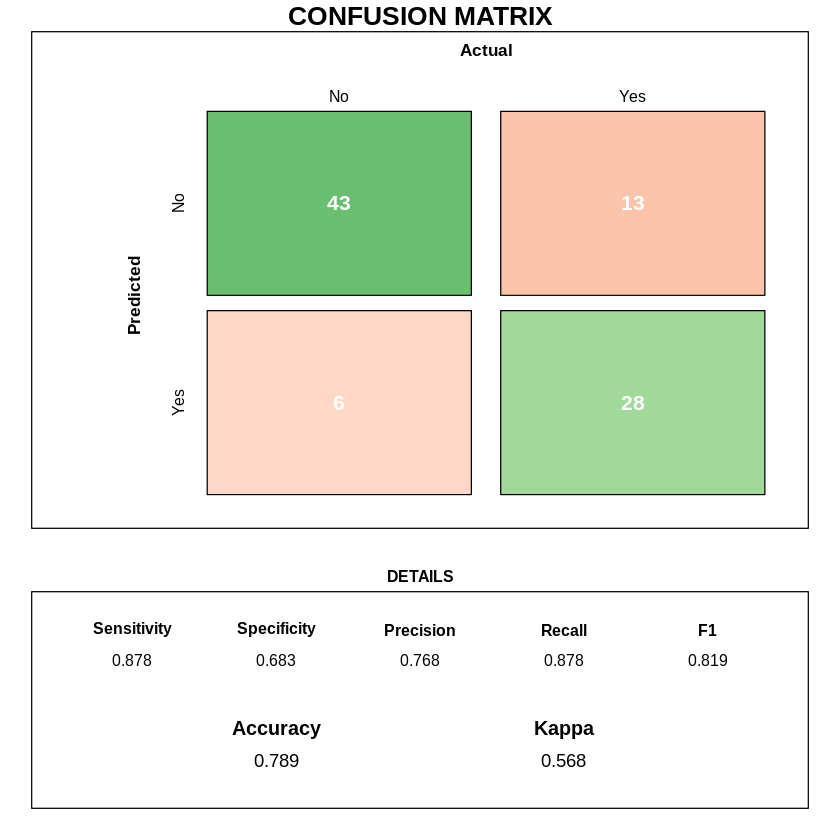

In [14]:
cm <- caret::confusionMatrix(predict_value$predict_value, test$AHD)
draw_confusion_matrix(cm)

#### **배깅(Bagging)**

* 배깅(bagging) : ``중복``을 허용하는 샘플링. Bootstrap Aggregation의 줄임말
  * *통계학에서는 중복을 허용하는 샘플링을 부트스트래핑(bootstrapping)이라고 함*

* 배깅은 중복 추출 방법을 사용하기 때문에 같은 데이터가 한 데이터셋에  여러 번 추출될 수도 있고, 어떤 데이터는 추출되지 않을 수도 있다.

* 데이터가 충분히 큰 경우, 각 데이터가 하나의 붓스트랩 표본에서 제외될 확률은 36.78%이다

<br>

<p align="center"><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbTZVqu%2Fbtqw4oKck4I%2FKbO0ih5GDB5qP2HNtUsGa0%2Fimg.png" width="600"/> 

<p align="center"><img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FReb8Q%2Fbtqw5gkMnjn%2FaWVHsgQihxY7wmaNEN8Ay0%2Fimg.jpg" width="600"/> 

* bagging

<p align="center"><img src="https://github.com/Jin0331/TA/blob/master/image/bagging.png?raw=true" width="600"/></p>


In [15]:
library(ipred)

In [16]:
# nbagg -> dicision tree를 몇개나 만들지 정함

set.seed(66)
AHD_bagging <- ipred::bagging(AHD ~ ., data = train, nbagg = 100)

In [17]:
predict_value <- predict(AHD_bagging, test, type = "class") %>% 
 tibble(predict_value = .)
predict_check <- test %>% select(AHD) %>% dplyr::bind_cols(., predict_value) 

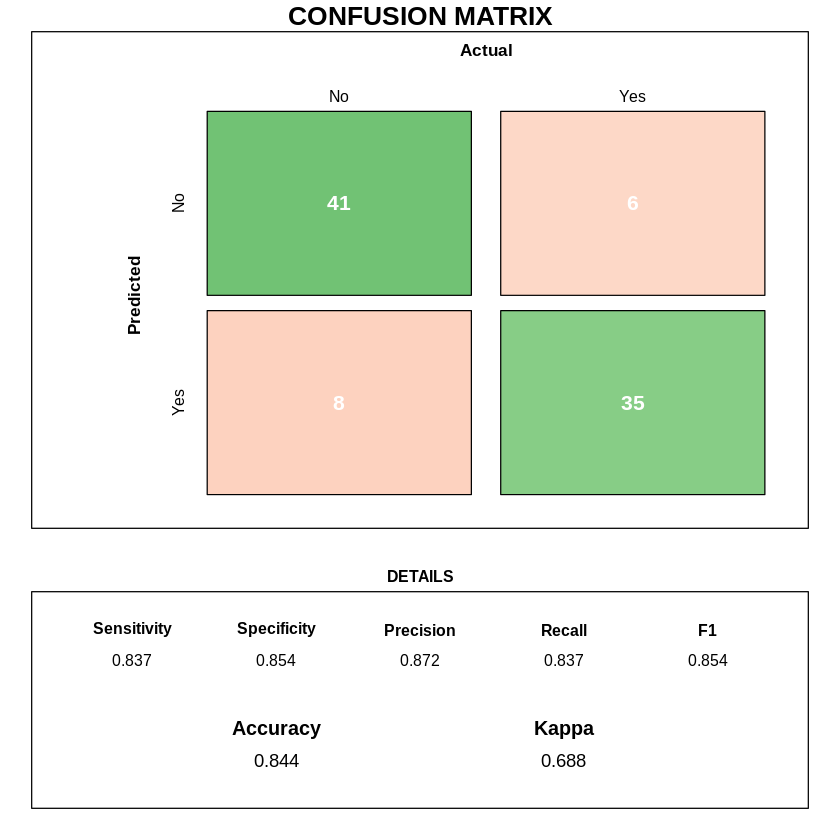

In [18]:
cm <- caret::confusionMatrix(predict_value$predict_value, test$AHD)
draw_confusion_matrix(cm)

#### **부스팅(Boosting)**

* 부스팅(Boosting) : 약한 학습기를 여러 개 연결해서 강한 학습기를 만드는 앙상블 방법
   * 앞 모델을 보완해 나가도록 모델을 학습하여 연결해 나감
   * AdaBoost (Adpative Boosting), Gradient Boosting 이 있음

<br>

<p align="center"><img src="https://github.com/Jin0331/TA/blob/master/image/boosting.png?raw=true" width="450"/></p>

In [19]:
install.packages("adabag")
library(adabag)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘doParallel’


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel


Attaching package: ‘adabag’


The following object is masked from ‘package:ipred’:

    bagging




In [21]:
# Facotr 변수 존재하면 적용 안 되는 듯..
# # 계속 무한루프 돔

# AHD_boost <- adabag::boosting(AHD ~ ., data = train)

### **<랜덤 포레스트(Random Forests)>**

* 랜덤포레스트(random forest)는 배깅에 랜덤과정(설명변수)을 추가한 방법이다.
* 원래 트레이닝  자료로부터 붓스트랩 샘플을 추출하고, 각 붓스트랩 샘플에 대해 트리를 형성해 나가는 과정은 배깅과 유사하나, 각 노드마다 모든 예측변수 안에서 최적의 분할(split)을 선택하는 방법 대신 예측변수들을 임의로 추출하고, 추출된 변수 내에서 최적의 분할을 만들어 나가는 방법을 사용한다.
* 새로운 자료에 대한 예측은 분류(classification)의 경우는 다수결(majority votes)로, 회귀(regression)의 경우에는 평균을 취하는 방법을 사용한다.

<br>

<p align="center"><img src="https://github.com/Jin0331/TA/blob/master/image/random_forests.jpg?raw=true" width="550"></p>


* __배깅과 랜덤 포레스트의 차이?__
  * 배깅의 일종. 배깅과 다른 점은, ``'설명변수'도 무작위로 선택``. 즉, 설명변수를 무작위로 선택함으로써, 트리의 다양성을 확보하여 모형간의 상관관계를 줄이고자 하는 것



In [22]:
#install.packages("randomForest")
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [23]:
# 랜던포레스트 사용시 NA값이 있으면 안된다. 

summary(train)

       X1             Age        Sex            ChestPain       RestBP     
 Min.   :  2.0   Min.   :34.00   0: 72   asymptomatic:101   Min.   :100.0  
 1st Qu.: 79.0   1st Qu.:48.00   1:141   nonanginal  : 56   1st Qu.:120.0  
 Median :157.0   Median :56.00           nontypical  : 38   Median :130.0  
 Mean   :154.9   Mean   :55.04           typical     : 18   Mean   :132.8  
 3rd Qu.:232.0   3rd Qu.:62.00                              3rd Qu.:140.0  
 Max.   :303.0   Max.   :77.00                              Max.   :200.0  
      Chol       Fbs     RestECG     MaxHR       ExAng      Oldpeak     
 Min.   :141.0   0:184   0:113   Min.   : 71.0   0:144   Min.   :0.000  
 1st Qu.:212.0   1: 29   1:  4   1st Qu.:133.0   1: 69   1st Qu.:0.000  
 Median :242.0           2: 96   Median :155.0           Median :0.800  
 Mean   :246.9                   Mean   :149.9           Mean   :1.053  
 3rd Qu.:274.0                   3rd Qu.:168.0           3rd Qu.:1.600  
 Max.   :564.0                

In [24]:
# 랜덤포레스트 안의 기능인 na.action = na.omit 으로 결측치를 제거해준다. 
# importance -> 중요도를 파악할 수 있는 기능
#  mtry = 7, ntree = 1000 = 하이퍼파라미터 -> 성능을 높임
# mtry = 7 -> 모델 하나 만들때 몇개의 특성을 이용할지 결정
# ntree => 1000개의 decision tree를 만든다. 
# OOB estimate of  error rate: 18.75%  -> 사용하지 않은 데이터로 test해봤을때 18%정도 오류값이 나왔다. 


AHD_RF <- randomForest(AHD ~ . -X1, data = train, na.action = na.omit, importance = T, mtry = 7, ntree = 1000)
AHD_RF


Call:
 randomForest(formula = AHD ~ . - X1, data = train, importance = T,      mtry = 7, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 18.75%
Confusion matrix:
    No Yes class.error
No  95  16   0.1441441
Yes 23  74   0.2371134

* mtry 골드 스탠다드(gold standard) : sqrt(설명변수 개수)

In [25]:
# sqrt= 루트를 씌우는 함수 
# 반응변수와 사용되지않을 변수인 X1과 AHD를 뺀 자료들의 갯수를
# 루트 씌우고 floor해서 소수점 날림
# 가장 적합한 mtry를 찾을 수 있음


mtry_sqrt <- train %>% select(-X1, -AHD) %>% colnames() %>%
 length() %>% sqrt() %>% floor()

mtry_sqrt

[1] 3

In [26]:
# mtry 바꿨더니 성능이 향상된것을 볼 수 있다. 

set.seed(52)
AHD_RF <- randomForest(AHD ~ . -X1, data = train, na.action = na.omit, importance = T, mtry = mtry_sqrt, ntree = 1000)
AHD_RF


Call:
 randomForest(formula = AHD ~ . - X1, data = train, importance = T,      mtry = mtry_sqrt, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.79%
Confusion matrix:
    No Yes class.error
No  98  13   0.1171171
Yes 24  73   0.2474227

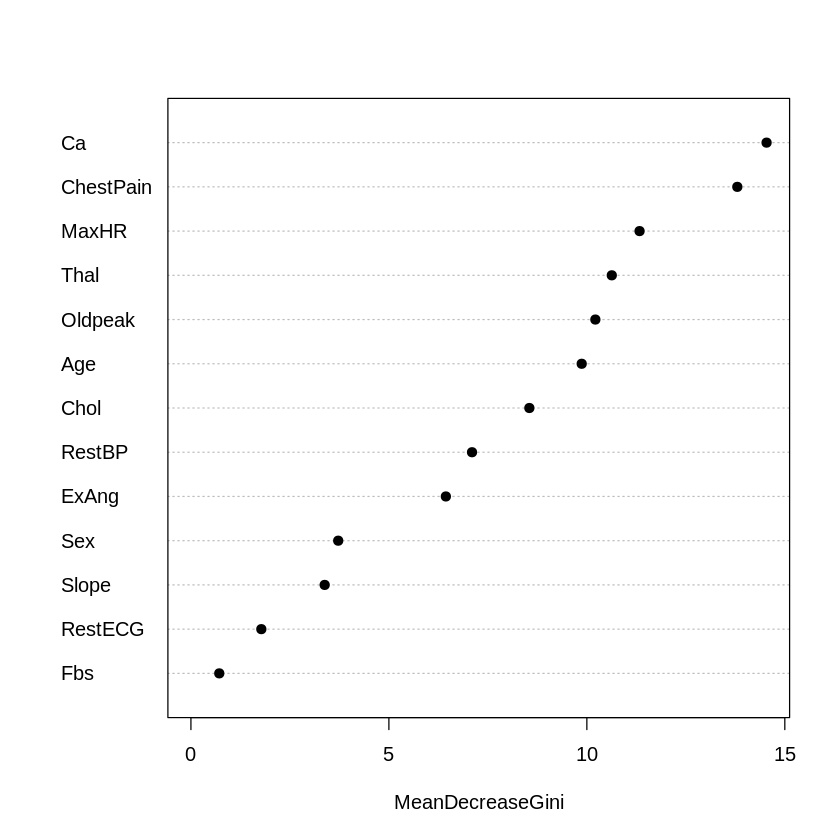

In [27]:
# 중요도를 파악할 수 있는 함수 
# ca와 chestPain이 중요한 변수인것을 알 수 있다. 

varImpPlot(AHD_RF, type=2, pch=19, col=1, cex=1, main="")

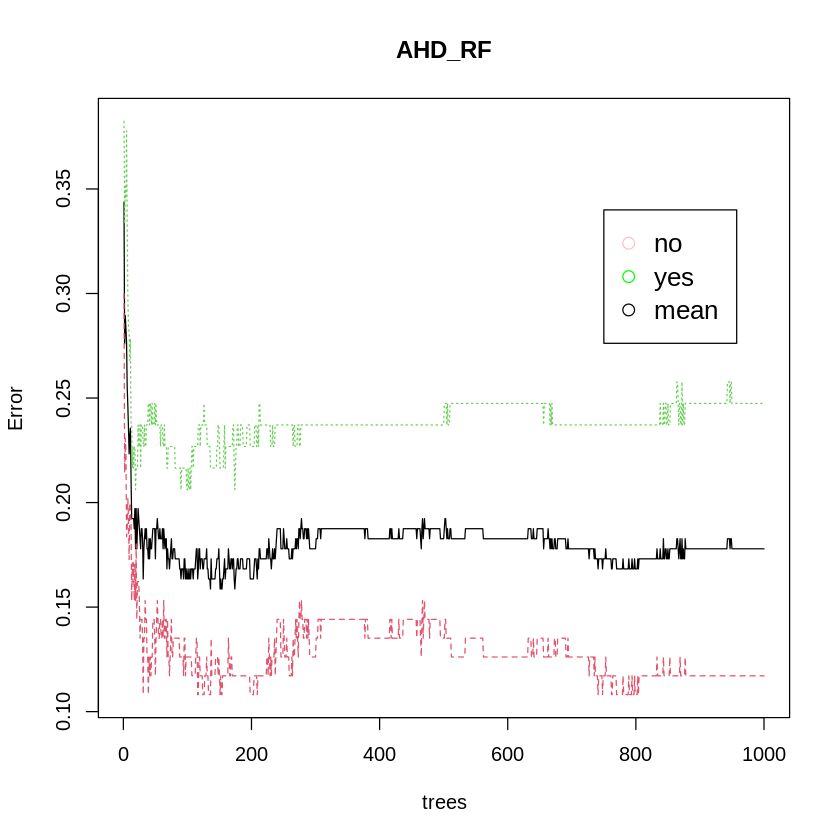

In [58]:
# 트리갯수가 증가함에 따라 오차의 변화를 볼 수 있다.  
# yes(초록색) -> AHD가 맞다고 한 자료는  트리가 증가할수록 오차가 올라가는 것을 볼 수 있다. 
# no(pink) -> AHD가 아니라고 한 자료는 트리가 증가할수록 오차가 감소하는 것을 볼 수 있다. 


plot(AHD_RF)
legend(x = 750, y = 0.34, c("no", "yes", "mean"), col = c("pink", "green", "black"), pch = c(1,1,1), cex = 1.3)

* 예측 및 평가

In [29]:
predict_value <- predict(AHD_RF, test, type = "class") %>% 
 tibble(predict_value = .)
predict_check <- test %>% select(AHD) %>% dplyr::bind_cols(., predict_value) 

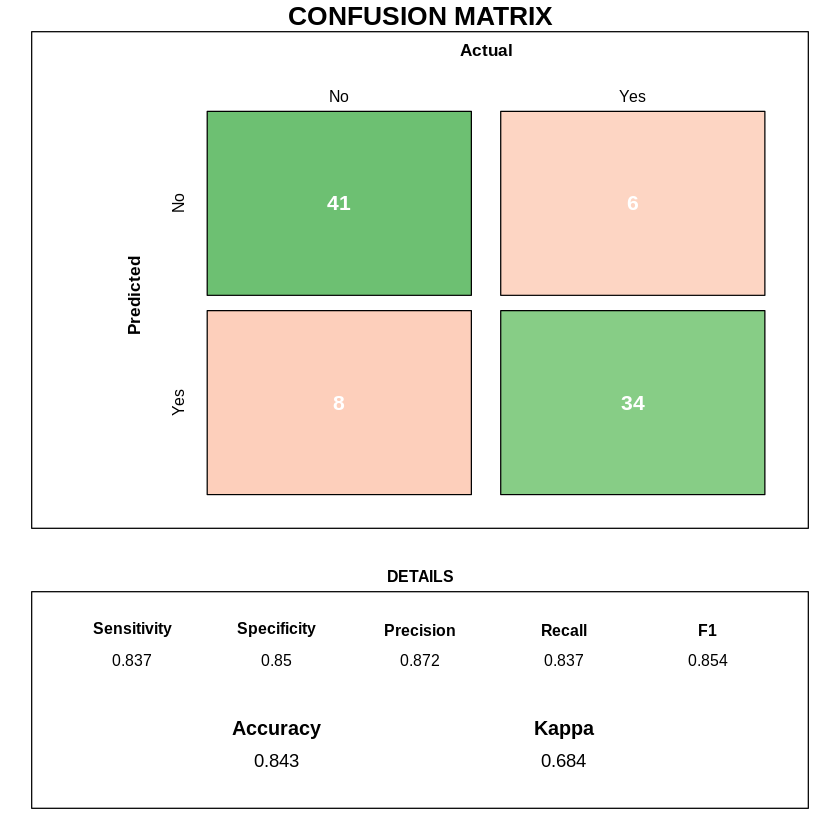

In [30]:
cm <- caret::confusionMatrix(predict_value$predict_value, test$AHD)
draw_confusion_matrix(cm)

- - -

#### **B. titanic**

* https://www.kaggle.com/c/titanic/data

**<kaggle의 타이타닉 data>**

  * survived : 생존=1, 죽음=0
  * pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
  * sibsp : 함께 탑승한 형제 또는 배우자 수
  * parch : 함께 탑승한 부모 또는 자녀 수
  * ticket : 티켓 번호
  * cabin : 선실 번호
  * embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [31]:
train <- read_csv("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)




In [32]:
str(train)

tibble [891 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ PassengerId: num [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] NA "C85" NA "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  

In [33]:
train %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

* 범주형 변수 확인

In [34]:
train <- train %>% 
 select(-PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked", "Pclass"), factor)
summary(train)

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked  
 Min.   :  0.00   C   :168  
 1st Qu.:  7.91   Q   : 77  
 Median : 14.45   S   :644  
 Mean   : 32.20   NA's:  2  
 3rd Qu.: 31.00             
 Max.   :512.33             
                            

* Hmisc::impute을 이용한 NA 값 대체(평균, 중앙값, 특정 숫자)

* https://m.blog.naver.com/PostView.nhn?blogId=tjdudwo93&logNo=221142961499&proxyReferer=https:%2F%2Fwww.google.com%2F

In [35]:
# Hmisc를 이용해서 NA값 대체함 -> 수치형 데이터에서만 사용가능 

install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




In [36]:
# 결측치를 중간값으로 대채한다. 

library(Hmisc)
train$Age <- impute(train$Age, median)

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [37]:
# age 결측치 제거함 
# 아직 Embarked에 결측치가 있음 -> 수치형데이터가 아니기 때문에 삭제함 

train %>% summary()


 177 values imputed to 28 



 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:22.00   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.36   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:35.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
      Fare        Embarked  
 Min.   :  0.00   C   :168  
 1st Qu.:  7.91   Q   : 77  
 Median : 14.45   S   :644  
 Mean   : 32.20   NA's:  2  
 3rd Qu.: 31.00             
 Max.   :512.33             

In [38]:
# 남은 결측치 제거 

train <- train %>% na.omit()

In [39]:
train %>% summary()


 177 values imputed to 28 



 Survived Pclass      Sex           Age            SibSp       
 0:549    1:214   female:312   Min.   : 0.42   Min.   :0.0000  
 1:340    2:184   male  :577   1st Qu.:22.00   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.0000  
                               Mean   :29.32   Mean   :0.5242  
                               3rd Qu.:35.00   3rd Qu.:1.0000  
                               Max.   :80.00   Max.   :8.0000  
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000   C:168   
 1st Qu.:0.0000   1st Qu.:  7.896   Q: 77   
 Median :0.0000   Median : 14.454   S:644   
 Mean   :0.3825   Mean   : 32.097           
 3rd Qu.:0.0000   3rd Qu.: 31.000           
 Max.   :6.0000   Max.   :512.329           

* **train을 이용한 Random Forests 모델 생성**

In [40]:
# 가장 적합한 mtry 갯수 설정
# mtry는 모델 만들때 몇개의 특징을 사용할 것인지를 결정 하는 것
# 2가지 특징으로 분류하는게 가장 성능 좋을것이다. 

mtry_sqrt <- train %>% select(-Survived) %>% colnames() %>%
 length() %>% sqrt() %>% floor()
mtry_sqrt

[1] 2

In [41]:
# set.seed(29)
# OOB estimate of  error rate: 16.2% -> 83% 정도의 정확도를 가진다. 

model <- randomForest(Survived ~ ., data = train,importance = T, mtry = mtry_sqrt, ntree = 1000)
model


Call:
 randomForest(formula = Survived ~ ., data = train, importance = T,      mtry = mtry_sqrt, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.2%
Confusion matrix:
    0   1 class.error
0 508  41  0.07468124
1 103 237  0.30294118

* caret과 e1071 패키지를 이용한 grid search

https://www.guru99.com/r-random-forest-tutorial.html

* Default setting : K-fold cross validation is controlled by the trainControl() function

```
trainControl(method = "cv", number = n, search ="grid")
arguments
- method = "cv": The method used to resample the dataset. 
- number = n: Number of folders to create
- search = "grid": Use the search grid method. For randomized method, use "grid"
Note: You can refer to the vignette to see the other arguments of the function.
```

In [42]:
# 최적의 파라미터(mtry, ntree등)를 구하기 위해 e1071패키지를 사용 
# 
# Define the control
trControl <- trainControl(method = "cv", number = 10, search = "grid")

* Default setting:he build the model with the default values
  * parameter를 따로 지정하지 않는다면, default로 mtry에 대한 grid search

In [43]:
# Run the model
rf_default <- train(Survived~., data = train, method = "rf", metric = "Accuracy", trControl = trControl)
# Print the results
print(rf_default)

Random Forest 

889 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 800, 800, 800, 800, 801, 800, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8256767  0.6126264
  5     0.8301456  0.6352850
  9     0.8155388  0.6062727

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.


* Search best mtry

In [44]:
tuneGrid <- expand.grid(.mtry = c(2: 6)) # 변수개수 7개. 
rf_mtry <- train(Survived~.,
    data = train, method = "rf",
    metric = "Accuracy", tuneGrid = tuneGrid,
    trControl = trControl, importance = T, ntree = 1000)
print(rf_mtry)

Random Forest 

889 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 800, 800, 800, 800, 800, 801, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8244510  0.6081952
  3     0.8300562  0.6269993
  4     0.8413304  0.6559073
  5     0.8345633  0.6431610
  6     0.8267109  0.6290006

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 4.


In [45]:
# 최적의 mtry가 4인것을 알 수 있다. 

best_mtry <- rf_mtry$bestTune$mtry
best_mtry

[1] 4

* best ntree

In [46]:
# ntree를 바꿔가면서 최적의 ntree를 찾아본다. 
# 300에서 결과가 가장좋은것을 볼 수 있다. 

tuneGrid <- expand.grid(.mtry = best_mtry)
store_maxtrees <- list()
for (ntree in c(250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000)) {
    set.seed(51)
    rf_maxtrees <- train(Survived~.,
        data = train,
        method = "rf",
        metric = "Accuracy",
        tuneGrid = tuneGrid,
        trControl = trControl,
        importance = T,
        ntree = ntree)
    key <- toString(ntree)
    store_maxtrees[[key]] <- rf_maxtrees
}
results_tree <- resamples(store_maxtrees)
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
250  0.741573 0.7837079 0.8426966 0.8347421 0.8735955 0.9204545    0
300  0.741573 0.7921348 0.8258427 0.8347549 0.8735955 0.9318182    0
350  0.741573 0.7865169 0.8314607 0.8324949 0.8651685 0.9204545    0
400  0.741573 0.7865169 0.8314607 0.8336185 0.8735955 0.9204545    0
450  0.741573 0.7865169 0.8370787 0.8336185 0.8735955 0.9204545    0
500  0.752809 0.7865169 0.8314607 0.8336185 0.8735955 0.9204545    0
550  0.752809 0.7865169 0.8426966 0.8369893 0.8735955 0.9204545    0
600  0.752809 0.7865169 0.8370787 0.8336185 0.8651685 0.9204545    0
800  0.752809 0.7865169 0.8370787 0.8336185 0.8651685 0.9204545    0
1000 0.752809 0.7865169 0.8258427 0.8313713 0.8651685 0.9204545    0
2000 0.752809 0.7865169 0.8370787 0.8336185 0.8651685 0.9204545    0

Kappa 
          Min.

best parameter
* mtry = 4
* ntree = 300

In [47]:
# greed 로 구한 최적의 mtry와 ntree를 사용해서 모델을 구성한다. 

set.seed(8)
model_grid <- randomForest(Survived ~ ., data = train, importance = T, mtry = 4, ntree = 300)
model_grid


Call:
 randomForest(formula = Survived ~ ., data = train, importance = T,      mtry = 4, ntree = 300) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 4

        OOB estimate of  error rate: 16.09%
Confusion matrix:
    0   1 class.error
0 490  59   0.1074681
1  84 256   0.2470588

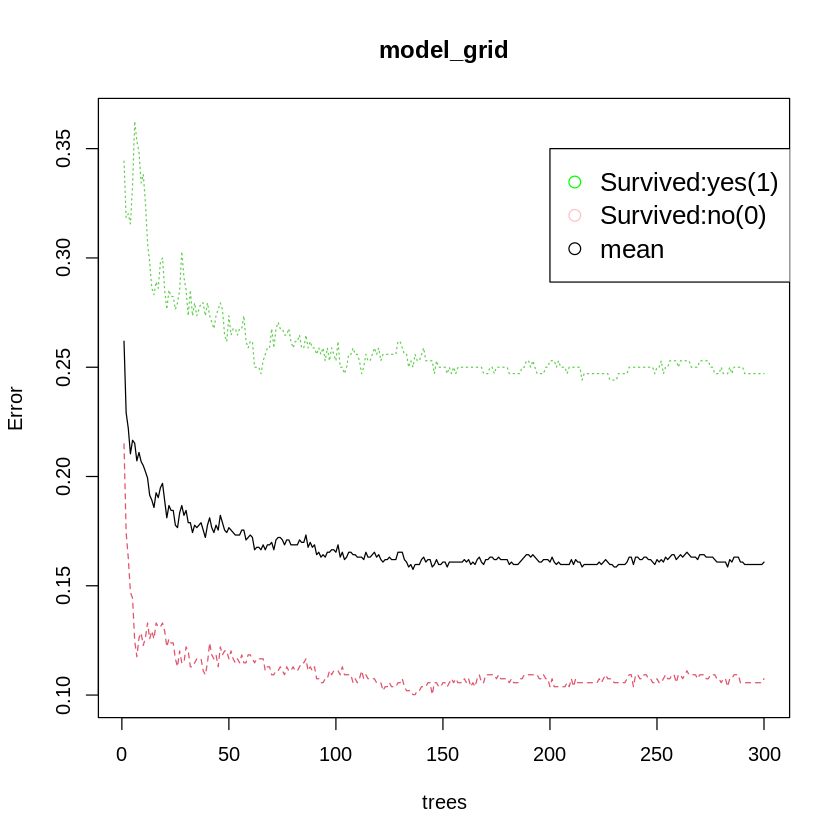

In [48]:
# 트리가 증가할수록 (자식노드로 내려갈수록) 에러가 감소하는것을 볼 수 있다. 

plot(model_grid)
legend(x = 200, y = 0.35, c("Survived:yes(1)", "Survived:no(0)", "mean"), col = c("green", "pink", "black"), pch = c(1,1,1), cex = 1.3)

* 생성한 2개의 Decision Tree 모델을 이용하여 kaggle에 제출 및 평가받기

In [49]:
# 만든 모델로 성능평가를 하기 위해 test 데이터도 전처리를 해줘야함 

test <- read_csv("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv")
test %>% summary()


── Column specification ────────────────────────────────────────────────────────
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)




  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

* NA 값 추정(median)

In [50]:
test$Age <- impute(test$Age, median)
test$Fare <- impute(test$Age, median)
test %>% summary()


 86 values imputed to 27 


 86 values imputed to 27 



  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.60   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max.   :76.00   Max.   :8.0000   Max.   :9.0000                     
      

* 범주형 변수

In [51]:
test <- test %>% 
 select(-Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked", "Pclass"), factor)
summary(test)


 86 values imputed to 27 


 86 values imputed to 27 



  PassengerId     Pclass      Sex           Age            SibSp       
 Min.   : 892.0   1:107   female:152   Min.   : 0.17   Min.   :0.0000  
 1st Qu.: 996.2   2: 93   male  :266   1st Qu.:23.00   1st Qu.:0.0000  
 Median :1100.5   3:218                Median :27.00   Median :0.0000  
 Mean   :1100.5                        Mean   :29.60   Mean   :0.4474  
 3rd Qu.:1204.8                        3rd Qu.:35.75   3rd Qu.:1.0000  
 Max.   :1309.0                        Max.   :76.00   Max.   :8.0000  
     Parch             Fare       Embarked
 Min.   :0.0000   Min.   : 0.17   C:102   
 1st Qu.:0.0000   1st Qu.:23.00   Q: 46   
 Median :0.0000   Median :27.00   S:270   
 Mean   :0.3923   Mean   :29.60           
 3rd Qu.:0.0000   3rd Qu.:35.75           
 Max.   :9.0000   Max.   :76.00           

* 예측(model, model_grid 모델)

In [52]:
# model
predict_value <- predict(model, test, type = "class") %>% tibble(Survived = .)
submission1 <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_value)

# model_grid
predict_value <- predict(model_grid, test, type = "class") %>% tibble(Survived = .)
submission2 <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_value)

In [53]:
submission1 %>% head(20)

PassengerId,Survived
<dbl>,<fct>
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [54]:
submission2 %>% head(20)

PassengerId,Survived
<dbl>,<fct>
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,1


In [55]:
 # write
 submission1 %>% write_csv(path = "submission1.csv")
 submission2 %>% write_csv(path = "submission2_grid.csv")

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [56]:
model_bagg <- ipred::bagging(Survived ~ ., data = train, nbagg = 200)

In [57]:
#@title
predict_value <- predict(model_bagg, test, type = "class") %>% tibble(Survived = .)
submission1 <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_value) %>%
 write_csv(path = "submission3_bagging.csv")

### Confusion Matrix plot code

In [12]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}